# **Import Modules**

In [2]:
import pandas as pd
import numpy as np
import os #to deal with files 
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
import librosa  # for audio libraries
import librosa.display
from IPython.display import Audio #for audio playing
import warnings
warnings.filterwarnings("ignore")


# **Loading the Datasets**

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Data set is loaded")

Data set is loaded


In [4]:
paths[:5]

['Data\\OAF_angry\\OAF_back_angry.wav',
 'Data\\OAF_angry\\OAF_bar_angry.wav',
 'Data\\OAF_angry\\OAF_base_angry.wav',
 'Data\\OAF_angry\\OAF_bath_angry.wav',
 'Data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

# **Creating and loading the Dataframe**

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,Data\OAF_angry\OAF_back_angry.wav,angry
1,Data\OAF_angry\OAF_bar_angry.wav,angry
2,Data\OAF_angry\OAF_base_angry.wav,angry
3,Data\OAF_angry\OAF_bath_angry.wav,angry
4,Data\OAF_angry\OAF_bean_angry.wav,angry


In [7]:
print(df.info())
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  5600 non-null   object
 1   label   5600 non-null   object
dtypes: object(2)
memory usage: 87.6+ KB
None


label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

# **Exploratory Data Analysis**

<Axes: xlabel='label', ylabel='count'>

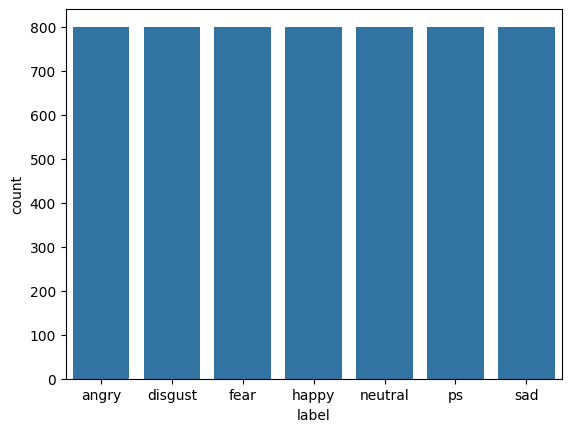

In [8]:
sns.countplot(x=df['label'])

Wave plot

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(5, 5))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr, color='b')
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(5, 5))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

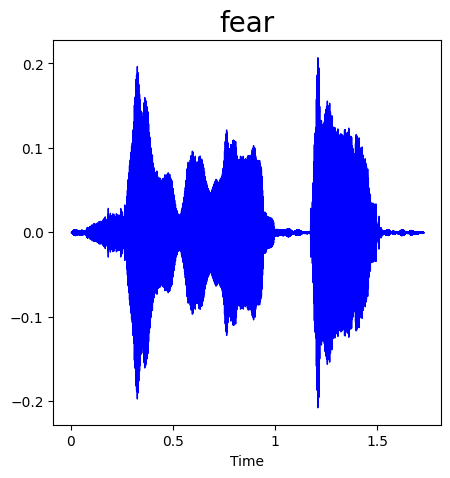

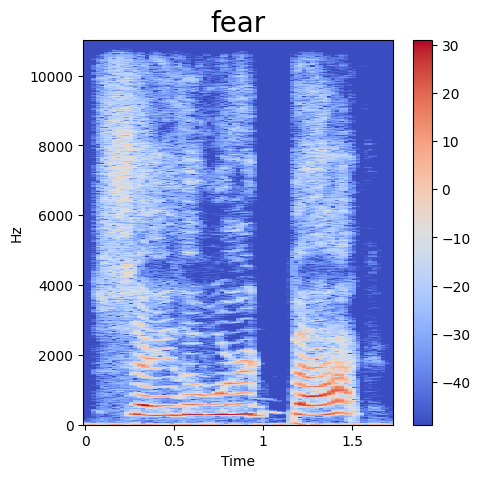

In [10]:
emotion = 'fear'
# Assuming df is defined elsewhere in your code
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

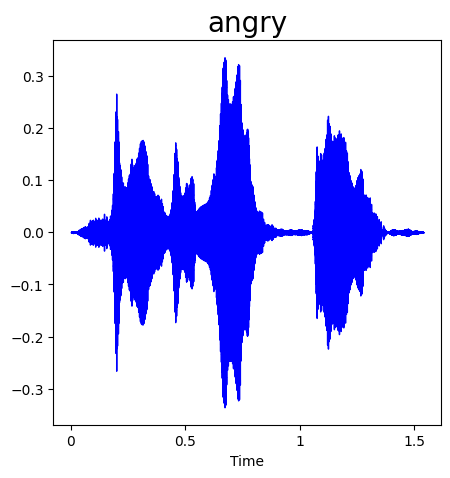

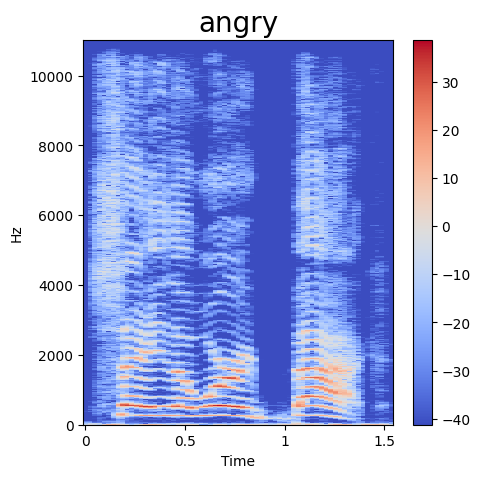

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectrogram(data,smapling_rate,emotion)
Audio(path)

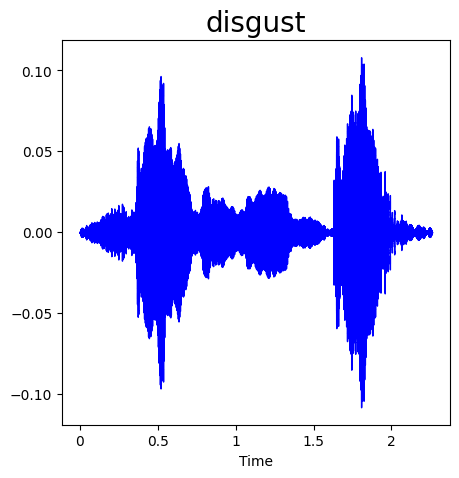

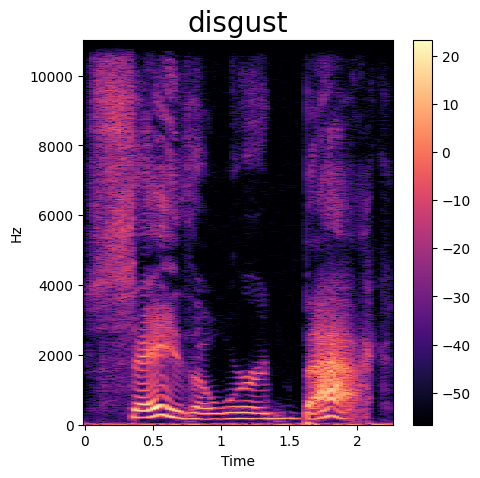

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectrogram(data,smapling_rate,emotion)
Audio(path)

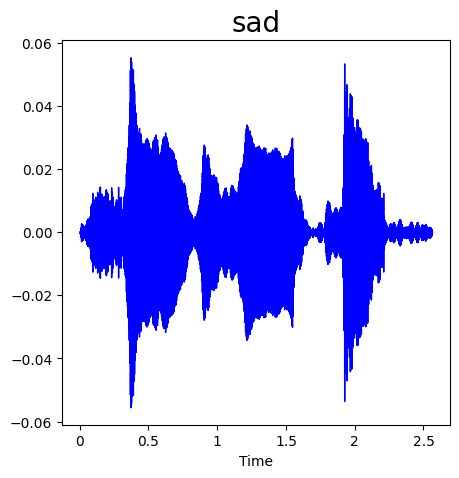

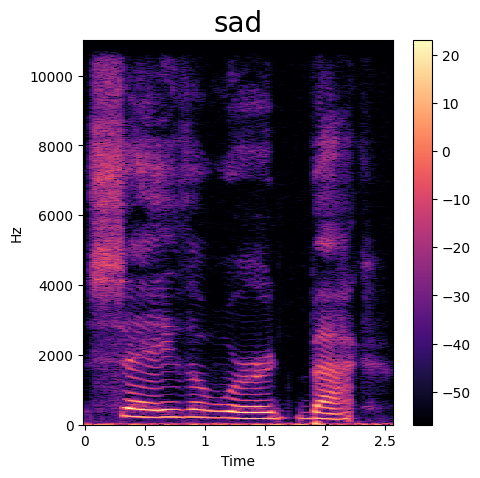

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectrogram(data,smapling_rate,emotion)
Audio(path)

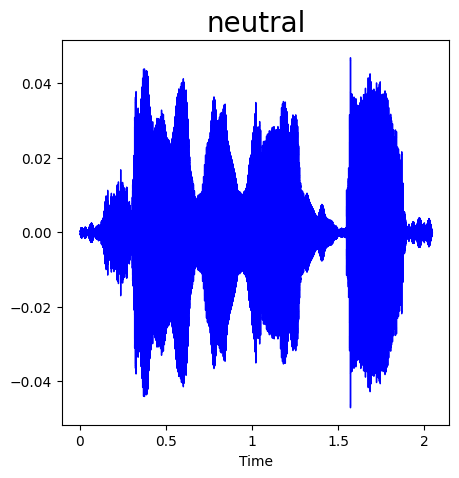

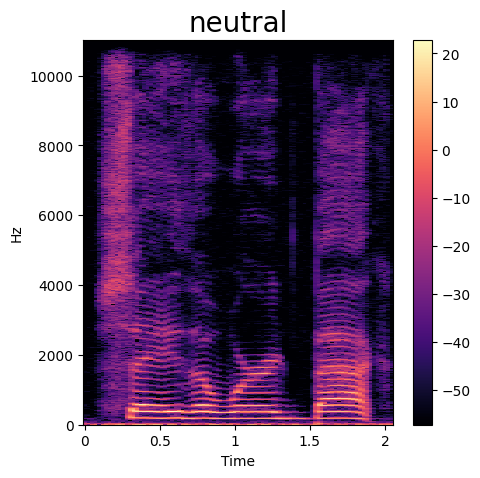

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectrogram(data,smapling_rate,emotion)
Audio(path)

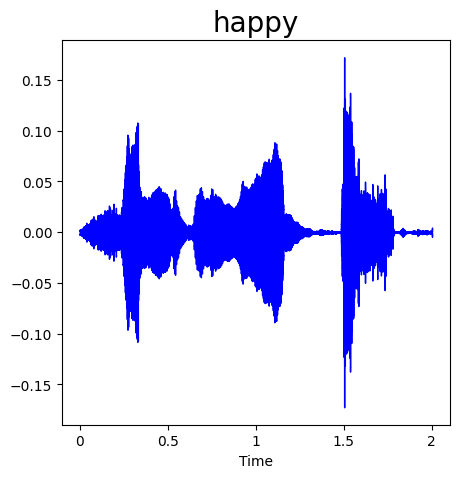

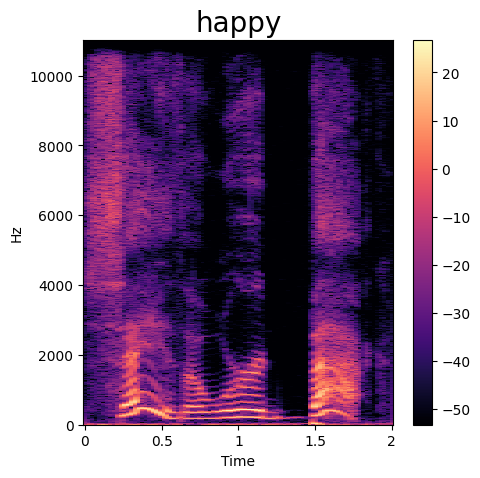

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectrogram(data,smapling_rate,emotion)
Audio(path)

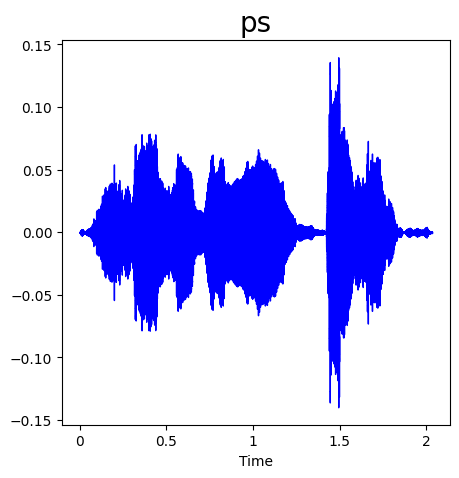

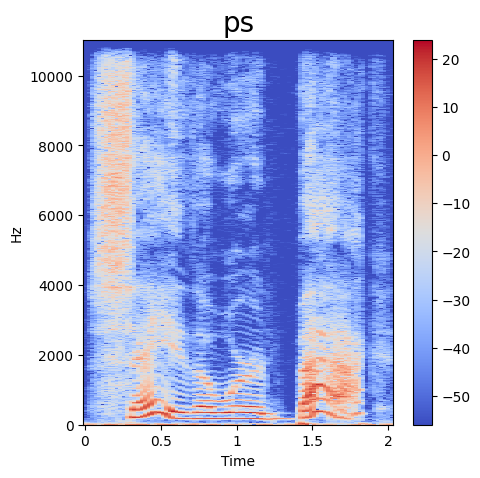

In [16]:
# Pleasant Surprise
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data,smapling_rate = librosa.load(path)
waveplot(data,smapling_rate,emotion)
spectrogram(data,smapling_rate,emotion)
Audio(path)

# **Feature Extraction**

In [17]:
def extract_mfcc(file_name):
    y,sr = librosa.load(file_name,duration=3,offset=0.5)
    mfcc =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [37]:
extract_mfcc(df['speech'][0])

array([-3.9698630e+02,  7.7440544e+01, -1.9592793e+01, -2.1666689e+01,
       -2.1127563e+00,  1.0075363e+01, -2.0366709e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736595e-01, -1.8325537e+00,  2.0210202e-01,
        7.2755092e-01,  1.3177378e+00,  2.8863375e+00,  2.8557916e+00,
       -4.7129192e+00, -4.4365101e+00, -1.6211587e+00, -1.0239840e+01,
       -7.5512633e+00, -1.7968794e+00, -7.0376520e+00,  9.4365845e+00,
        8.3558540e+00,  2.1712360e+01,  1.9216990e+01,  2.0348928e+01,
        1.3413368e+01,  8.3391733e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687399e+00,  5.4548688e+00,  2.5099635e+00, -1.8239068e+00,
        4.8689623e+00,  9.3139238e+00,  2.0891497e+00, -1.9064908e+00],
      dtype=float32)

In [18]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))

In [19]:
x_mfcc

0       [-396.9863, 77.440544, -19.592793, -21.666689,...
1       [-465.73267, 98.77373, 0.65600836, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550478, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.577072, -...
5599    [-421.8341, 70.69788, 32.47639, 45.642555, 4.7...
Name: speech, Length: 5600, dtype: object

In [20]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [21]:
X = np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y=encoder.fit_transform(df[['label']])

In [23]:
y=y.toarray()
y.shape


(5600, 7)

# **Creating the LSTM model**

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123,return_sequences=False, input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [25]:
# Train the model
history = model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 4s 205ms/step - loss: 1.7913 - accuracy: 0.3027 - val_loss: 1.8404 - val_accuracy: 0.2330
Epoch 2/100
9/9 [==============================] - 1s 145ms/step - loss: 1.5036 - accuracy: 0.4542 - val_loss: 1.6154 - val_accuracy: 0.3518
Epoch 3/100
9/9 [==============================] - 1s 154ms/step - loss: 1.2133 - accuracy: 0.5375 - val_loss: 1.1388 - val_accuracy: 0.5455
Epoch 4/100
9/9 [==============================] - 1s 146ms/step - loss: 0.9354 - accuracy: 0.6299 - val_loss: 0.8595 - val_accuracy: 0.5839
Epoch 5/100
9/9 [==============================] - 1s 142ms/step - loss: 0.7368 - accuracy: 0.7092 - val_loss: 0.5967 - val_accuracy: 0.8152
Epoch 6/100
9/9 [==============================] - 1s 131ms/step - loss: 0.5665 - accuracy: 0.7915 - val_loss: 0.3444 - val_accuracy: 0.9009
Epoch 7/100
9/9 [==============================] - 1s 143ms/step - loss: 0.4446 - accuracy: 0.8449 - val_loss: 0.2564 - val_accuracy: 0.9196
Epoch 8/100
9

# **Plot the Results**

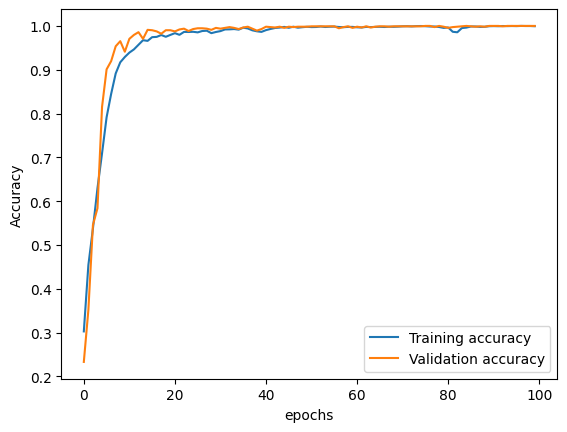

In [26]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,label="Training accuracy")
plt.plot(epochs,val_acc,label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

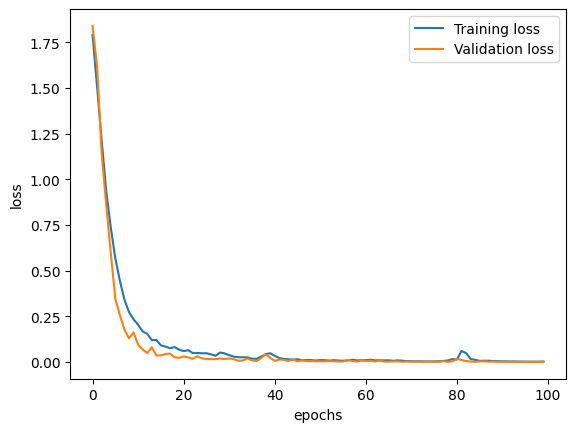

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [28]:
model.save('model.h5')

In [29]:

from keras.models import load_model

loaded_model = load_model('model.h5')


test_loss, test_accuracy = loaded_model.evaluate(X, y)

print("Test Accuracy:", test_accuracy)
print("Test loss:", test_loss)


175/175 [==============================] - 2s 9ms/step - loss: 1.7989e-04 - accuracy: 1.0000
Test Accuracy: 97.07%
Test loss: 0.0001798940502339974


CREATING RNN MODEL

In [33]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Assuming you have your data loaded into X and y
# X should be of shape (num_samples, sequence_length, input_features)
# y should be one-hot encoded for multi-class classification

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RNN model
model = Sequential([
    SimpleRNN(123, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the RNN model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100
                    , batch_size=512, shuffle=True)

# Now, define your test data (X_test and y_test)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X, y)
print("Test Accuracy:", test_accuracy)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 123)               15375     
                                                                 
 dense_12 (Dense)            (None, 64)                7936      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 7)                 231       
                                                                 
Total params: 25622 (100.09 KB)
Trainable params: 2562